In [1]:
import numpy as np
import pandas as pd

import keras
from keras.datasets import cifar10
from keras.models import *
from keras.layers import *
from keras.optimizers import *

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Load data

In [2]:
(X_train, y_train), (X_test, _) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [5]:
y_train = keras.utils.to_categorical(y_train)

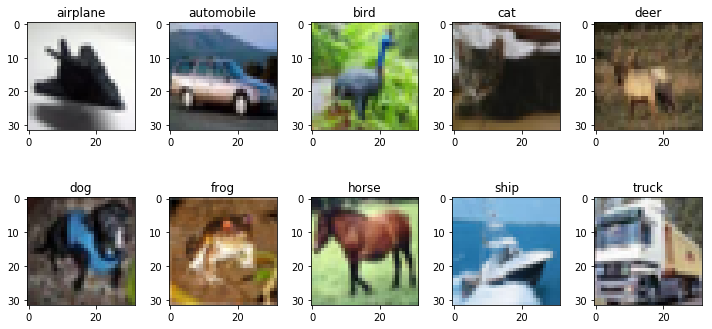

In [6]:
labels  = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

f, axs = plt.subplots(2,5, figsize=(10, 5))

for i, (ax, label) in enumerate(zip(axs.ravel(), labels)):
    ind = np.argmax(y_train[:,i]==1)
    img = X_train[ind]
    ax.imshow(img)
    ax.set_title(label)

f.tight_layout()

## Toy model

In [7]:
inputs = Input(shape=X_train[0].shape)
x = inputs
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
outputs = x
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [8]:
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1,  shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 25s 552us/step - loss: 1.5804 - acc: 0.4383 - val_loss: 1.2263 - val_acc: 0.5704
Epoch 2/10
45000/45000 [==============================] - 20s 449us/step - loss: 1.1348 - acc: 0.6037 - val_loss: 1.0319 - val_acc: 0.6400
Epoch 3/10
45000/45000 [==============================] - 20s 439us/step - loss: 0.9569 - acc: 0.6636 - val_loss: 0.9930 - val_acc: 0.6496
Epoch 4/10
45000/45000 [==============================] - 20s 440us/step - loss: 0.8270 - acc: 0.7122 - val_loss: 0.9028 - val_acc: 0.6966
Epoch 5/10
45000/45000 [==============================] - 20s 447us/step - loss: 0.7095 - acc: 0.7542 - val_loss: 0.8792 - val_acc: 0.7012
Epoch 6/10
45000/45000 [==============================] - 21s 476us/step - loss: 0.5995 - acc: 0.7928 - val_loss: 0.8927 - val_acc: 0.7070
Epoch 7/10
45000/45000 [==============================] - 21s 459us/step - loss: 0.4938 - acc: 0.8315 - val_loss: 0.8

## Preparing data for submission

In [9]:
predictions_test = np.argmax(model.predict(X_test), axis=1)

In [11]:
prediction_test_df  = pd.DataFrame(index = np.arange(0, len(X_test)))
prediction_test_df["Category"]= predictions_test
prediction_test_df.to_csv("submission.csv", index_label='Id')